<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]


#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

In [3]:
df.shape

(159, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   V_length  159 non-null    float64
 3   D_length  159 non-null    float64
 4   C_length  159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [6]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

,Weight,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
df_train, df_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
num_vars = ['Weight','V_length','D_length','C_length','Height','Width']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [10]:
df_train.head()

,Weight,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
120,0.543823,0.572816,0.574545,0.569257,0.591566,0.870743,0,1,0,0,0,0
65,0.087647,0.211650,0.210909,0.229730,0.423753,0.316475,1,0,0,0,0,0
12,0.300529,0.419417,0.420000,0.466216,0.711587,0.468031,0,0,0,0,0,0
16,0.422176,0.444660,0.447273,0.498311,0.776720,0.597344,0,0,0,0,0,0
62,0.032906,0.132039,0.129091,0.145270,0.286792,0.178535,1,0,0,0,0,0


In [12]:
X_train = df_train.drop('Weight',axis=1)
y_train = df_train.Weight

In [13]:
lr = LinearRegression()
pred_train = lr.fit(X_train,y_train).predict(X_train)

In [14]:
num_vars = ['Weight','V_length','D_length','C_length','Height','Width']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [15]:
X_test = df_test.drop('Weight',axis=1)
y_test = df_test.Weight

In [16]:
lr = LinearRegression()
pred_test = lr.fit(X_train,y_train).predict(X_test)

In [17]:
print('RMSE train',np.sqrt(mean_squared_error(y_train,pred_train)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,pred_test)))


RMSE train 0.055063114054041455
RMSE test 0.0597978903846244


#### errors are so close so model is not overfittng

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

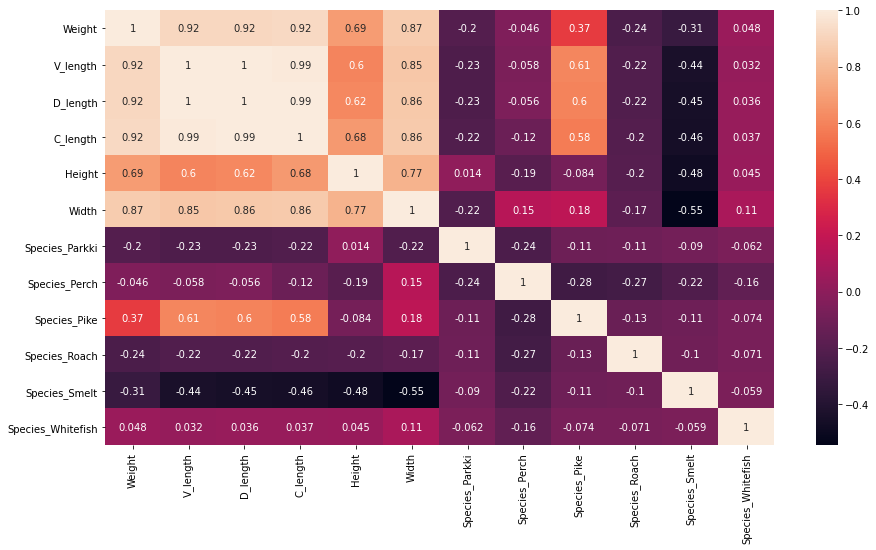

In [19]:
# type your code here
sns.heatmap(df_train.corr(),annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
ddf = df_train.drop('Weight',axis=1)

mylist =[]

for i in range(ddf.shape[1]):
    mylist.append(variance_inflation_factor(ddf.values, i)) # values of the data, instance
    

D = pd.DataFrame({"Features":ddf.columns, "VIF": mylist})
D.sort_values(by ='VIF',ascending=False)

,Features,VIF
1,D_length,16055.469214
0,V_length,10671.249865
2,C_length,4330.443325
3,Height,142.020597
4,Width,99.812964
7,Species_Pike,13.639637
6,Species_Perch,4.254705
8,Species_Roach,2.222541
9,Species_Smelt,1.780583
5,Species_Parkki,1.454535


#### we can see multicollinearity present in scaled data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
X_train = df_train.drop('Weight',axis=1)
y_train = df_train.Weight

In [22]:
X_test = df_test.drop('Weight',axis=1)
y_test = df_test.Weight

In [23]:
import statsmodels.api as sm

In [24]:
# type your code here
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV

ridge = Ridge(alpha=1.5, normalize=True)
pred_ridge = ridge.fit(X_train, y_train).predict(X_test)

In [25]:
X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(y_train, X_train_lm).fit()
pred_lr = lr.predict(X_test_lm)

In [26]:
print('RMSE ridge',np.sqrt(mean_squared_error(y_test,pred_ridge)))
print('RMSE lr',np.sqrt(mean_squared_error(y_test,pred_lr)))

RMSE ridge 0.07726182165322687
RMSE lr 0.05979789038462451


#### Linear regression model is better than Ridge regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
X_train_lm = sm.add_constant(X_train)
X_test_lm = sm.add_constant(X_test)
lr = sm.OLS(y_train, X_train_lm).fit()
pred_lr = lr.predict(X_test_lm)

In [52]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
pred_sgd = sgd.fit(X_train, y_train).predict(X_test)

In [53]:
print("LR RMSE:",np.sqrt(mean_squared_error(y_test,pred_lr)))

print("SGD RMSE:",np.sqrt(mean_squared_error(y_test,pred_sgd)))

LR RMSE: 0.05979789038462451
SGD RMSE: 0.1163230444680513


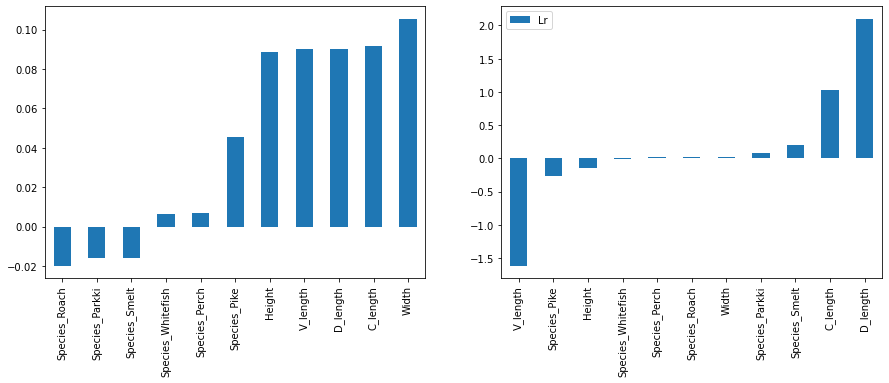

In [61]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
pd.Series(sgd.coef_,X_train.columns).sort_values().plot(kind='bar',ax=ax[0],label='SGD')
pd.Series(lr.params,X_train.columns).sort_values().plot(kind='bar',ax=ax[1],label='Lr')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here
from sklearn.linear_model import ElasticNet,Lasso,Ridge
enet = Lasso(alpha = 0.1, normalize=True, max_iter=10000)
pred_tr = enet.fit(X_train,y_train).predict(X_train)
pred_test = enet.fit(X_train,y_train).predict(X_test)

print("train error: ",(np.sqrt(mean_squared_error(y_train, pred_tr))))
print("test error: ",np.sqrt(mean_squared_error(y_test, pred_test)))

train error:  0.2177844524600416
test error:  0.211731167179071


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here
import statsmodels.api as sm

# Add a constant

X= sm.add_constant(df[['Width']])
y = df.Weight

# Create a first fitted model
lr = sm.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     579.0
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.52e-54
Time:                        22:18:35   Log-Likelihood:                -1036.9
No. Observations:                 159   AIC:                             2078.
Df Residuals:                     157   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -430.7425     36.904    -11.672      0.000    -503.636    -357.849
Width        187.8925      7.808     24.063      0.000     172.470     203.315
==============================================================================
Omnibus:                      100.078   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.292
Skew:                           2.298   Prob(JB):                    1.12e-138
Kurtosis:                      11.647   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 78% variation in Weight is explained by Width

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [27]:
# type your code here
from sklearn.model_selection import GridSearchCV
param = [{'alpha':[0.00001, 0.001, 0.1, 10, 100]}]

grid = GridSearchCV(estimator=Ridge(normalize=True),param_grid=param, cv = 5)
grid.fit(X_train,y_train)
print(grid.best_params_)


{'alpha': 0.1}


C:\Users\saurabh karpe\ana3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
ridge = Ridge(alpha=0.1,normalize=True)
pred_test = ridge.fit(X_train,y_train).predict(X_test)
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE Test: 0.04961914662608994


In [29]:
l = [0.00001, 0.001, 0.1, 10, 100]
for i in l:
    ridge = Ridge(alpha=i,normalize=True)
    pred_test = ridge.fit(X_train,y_train).predict(X_test)
    print("RMSE Test for alpha:",i,"is:", np.sqrt(mean_squared_error(y_test, pred_test)))
    

RMSE Test for alpha: 1e-05 is: 0.05990862315420007
RMSE Test for alpha: 0.001 is: 0.06165024841078716
RMSE Test for alpha: 0.1 is: 0.04961914662608994
RMSE Test for alpha: 10 is: 0.15052610655788548
RMSE Test for alpha: 100 is: 0.20285588038172464


#### at alpha = 0.1 returns lowest RMSE on the test set in ridge regression.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [31]:
# type your code here
from sklearn.linear_model import ElasticNet
param = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}]
grid = GridSearchCV(estimator=ElasticNet(normalize=True),param_grid=param, cv = 5)
grid.fit(X_train,y_train)
print(grid.best_params_)


{'alpha': 0.0001}


C:\Users\saurabh karpe\ana3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [32]:
# type your code here
param = [{'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}]
grid = GridSearchCV(estimator=Lasso(normalize=True),param_grid=param, cv = 5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'alpha': 0.0001}


C:\Users\saurabh karpe\ana3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
parameters = [{"l1_ratio": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

enet = ElasticNet(alpha=0.1,normalize=True)

grid = GridSearchCV(estimator=enet, param_grid=parameters, cv = 10)

grid.fit(X_train, y_train)
print(grid.best_params_) 
from sklearn.model_selection import GridSearchCV


{'l1_ratio': 0.001}


C:\Users\saurabh karpe\ana3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
enet = ElasticNet(alpha=0.1,normalize=True,l1_ratio=0.001)
pred_test = enet.fit(X_train,y_train).predict(X_test)
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE Test: 0.16000148052641017


In [39]:
l = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
for i in l:
    enet = ElasticNet(alpha=0.1,normalize=True,l1_ratio=i)
    pred_test = enet.fit(X_train,y_train).predict(X_test)
    print("RMSE Test for l1_ratio:",i,"is:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE Test for l1_ratio: 0.001 is: 0.16000148052641017
RMSE Test for l1_ratio: 0.005 is: 0.16126638634858237
RMSE Test for l1_ratio: 0.01 is: 0.1628234476473287
RMSE Test for l1_ratio: 0.05 is: 0.17517145737651701
RMSE Test for l1_ratio: 0.1 is: 0.1901997858974838
RMSE Test for l1_ratio: 0.5 is: 0.211731167179071
RMSE Test for l1_ratio: 1 is: 0.211731167179071
